                                           File name  Temperature (K)  \
1  OneView_200kV_10kX_FGT_A1_0010_017K_2.25um_NoF...               17   
7     OneView_200kV_10kX_FGT_A1_0012_019K_2.25um.png               19   
2     OneView_200kV_10kX_FGT_A1_0019_037K_2.25um.png               37   
6     OneView_200kV_10kX_FGT_A1_0029_061K_2.25um.png               61   
8     OneView_200kV_10kX_FGT_A1_0032_080K_2.25um.png               80   
3     OneView_200kV_10kX_FGT_A1_0036_103K_2.25um.png              103   
5     OneView_200kV_10kX_FGT_A1_0038_124K_2.25um.png              124   
4     OneView_200kV_10kX_FGT_A1_0040_130K_2.25um.png              130   
9     OneView_200kV_10kX_FGT_A1_0042_140K_2.25um.png              140   
0     OneView_200kV_10kX_FGT_A1_0046_156K_2.25um.png              156   

   Light pixel to total pixel ratio  
1                             0.522  
7                             0.526  
2                             0.520  
6                             0.517  
8     

Text(0.5, 1.0, 'Domain Wall Pixel Ratio vs Temperature')

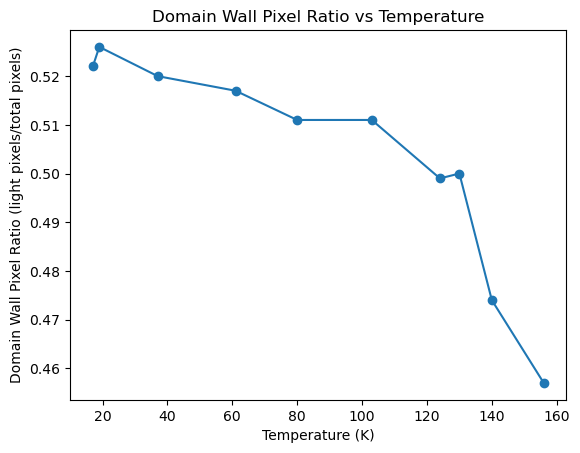

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

#load/ file
current_path = os.getcwd()
folder_name= '6000OLF_MedRibbon_2mmDefocus_20DegTilt_Rotated15Deg'
DATA_PATH = os.path.join(current_path, 'images', folder_name,'processed') #path to where the data is saved
file_path = os.path.join(DATA_PATH, 'data_summary.csv')

df=pd.read_csv(file_path)
df_sorted = df.sort_values(by='Temperature (K)')
print(df_sorted)
#plot temperature vs ratio

plt.plot(df_sorted['Temperature (K)'],df_sorted['Light pixel to total pixel ratio'],marker = 'o') 
plt.xlabel("Temperature (K)")
plt.ylabel("Domain Wall Pixel Ratio (light pixels/total pixels)")
plt.title("Domain Wall Pixel Ratio vs Temperature")
